# **Matrices Homogeneas en un espacio tridimensional**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [2]:
import numpy as np
from sympy import*
init_printing()

### Declaración de variables simbolicas

In [3]:
## Variables Simbolicas
theta = symbols("theta",  real=True)
phi = symbols("phi",  real=True)
psi = symbols("psi",  real=True)

### Rotacion eje x

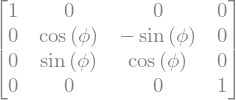

In [4]:
H_x = Matrix([[1, 0, 0, 0], [0, cos(phi), -sin(phi), 0], [0, sin(phi), cos(phi), 0], [0, 0, 0, 1]])
H_x

### Rotacion eje y

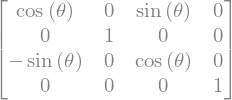

In [5]:
H_y = Matrix([[cos(theta), 0, sin(theta), 0], [0, 1, 0, 0], [-sin(theta), 0, cos(theta), 0], [0, 0, 0, 1]])
H_y


### Rotacion eje z

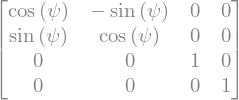

In [6]:
H_z = Matrix([[cos(psi), -sin(psi), 0, 0], [sin(psi), cos(psi), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
H_z

### Composicion de Matrices Homogeneas

Probando la conmutatividad de las matrices homogeneas

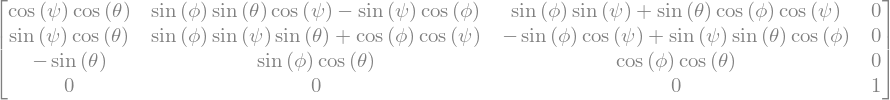

In [8]:
H = H_z@H_y@H_x
H

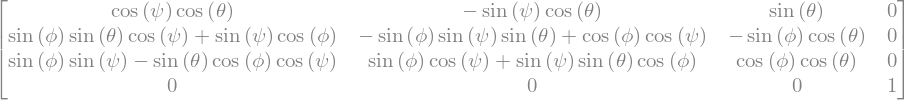

In [9]:
H = H_x@H_y@H_z
H

# **Experimento 1**
#### Comprobar que una secuencia de rotaciones produce el mismo resultado que una composición de matrices homogeneas

In [37]:
P0 = np.array([1, 1, 0])

1. Probando solo con matrices de rotación en 3D

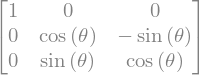

In [30]:
#Matriz de rotacion 3D sobre el eje x
R_x = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])
R_x

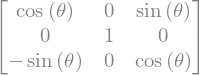

In [31]:
#Matriz de rotacion 3D sobre el eje y
R_y = Matrix([[cos(theta), 0, sin(theta)], [0, 1, 0], [-sin(theta), 0, cos(theta)]])
R_y

In [34]:
theta_val = np.pi/9 # 20 grados en radianes
R_x_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
R_y_p0 = np.array(R_y.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Ry

P0_rotado_x = np.dot(R_x_p0, P0) #Producto punto entre la matrix de rotación y el vector de posición del punto
P0_rotado_y = np.dot(R_y_p0, P0_rotado_x) #Producto punto entre la matrix de rotación y el vector de posición del punto

print(P0_rotado_y)

[ 1.0566704   0.93969262 -0.02062634]


2. Ahora probamos con la composición de matrices homogeneas

In [38]:
#Se convierte el punto 3D a un punto de coordenadas homogeneas

P0_homogeneo = np.append(P0, 1)
P0_homogeneo = np.reshape(P0_homogeneo, (4, 1))
print(P0)
print(P0_homogeneo)

[1 1 0]
[[1]
 [1]
 [0]
 [1]]


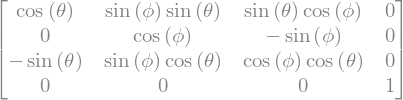

In [39]:
#Se realiza la composición de las matrices homogeneas para x y y
Hxy = H_y@H_x
Hxy

In [40]:
theta_val = np.pi/9 # 20 grados en radianes
phi_val = np.pi/9 # 20 grados en radianes

Hxy_p0 = np.array(Hxy.subs({phi: phi_val, theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
Hxy_p0

array([[ 0.93969262,  0.11697778,  0.3213938 ,  0.        ],
       [ 0.        ,  0.93969262, -0.34202014,  0.        ],
       [-0.34202014,  0.3213938 ,  0.88302222,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [41]:
P0_rotado_Hxy = np.dot(Hxy_p0, P0_homogeneo)
P0_rotado_Hxy

array([[ 1.0566704 ],
       [ 0.93969262],
       [-0.02062634],
       [ 1.        ]])

# **Actividad**

* Calcule las siguientes matrices homogeneas

In [52]:
from IPython.display import Image

Image(url='1.png')

## Donde:

In [51]:
Image(url='2.png')

# **Resultados aquí debajo**